In [1]:
!pip install diffusers

  Obtaining dependency information for diffusers from https://files.pythonhosted.org/packages/e4/c6/1f9768606c937e71c4d391307f395942c42d5567f538712dbf37b0cc0917/diffusers-0.25.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.8 MB/s eta 0:00:0000:01


In [63]:
# --markdown look at this for LoRA part
#from peft import LoftQConfig, LoraConfig, get_peft_model

#base_model = AutoModelForCausalLM.from_pretrained(...)  # don't quantize here
#loftq_config = LoftQConfig(loftq_bits=4, ...)           # set 4bit quantization
#lora_config = LoraConfig(..., init_lora_weights="loftq", loftq_config=loftq_config)
#peft_model = get_peft_model(base_model, lora_config)

In [17]:
from diffusers import DiffusionPipeline

# Dreamshaper -> use dreamshaper ?
pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, use_safetensors=True)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [19]:
import torch

pipeline.to("cuda")
generator = torch.Generator("cuda").manual_seed(0)

In [61]:
prompt = "stylized propaganda poster depicting the poised space marine in power armour. cold war style, high quality scan, trending on artstation --ar 1:2"

In [23]:
from diffusers import DPMSolverMultistepScheduler

pipeline.scheduler = DPMSolverMultistepScheduler.from_config(pipeline.scheduler.config)

In [28]:
def get_inputs(batch_size=1):
    generator = [torch.Generator("cuda").manual_seed(i) for i in range(batch_size)]
    prompts = batch_size * [prompt]
    num_inference_steps = 20

    return {"prompt": prompts, "generator": generator, "num_inference_steps": num_inference_steps}

In [29]:
pipeline.enable_attention_slicing()

In [40]:
from diffusers import AutoencoderKL

vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-mse", torch_dtype=torch.float16).to("cuda")
pipeline.vae = vae

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

In [ ]:
import gc

# it could be a good idea to execute this before the cell below
gc.collect()

  0%|          | 0/20 [00:00<?, ?it/s]

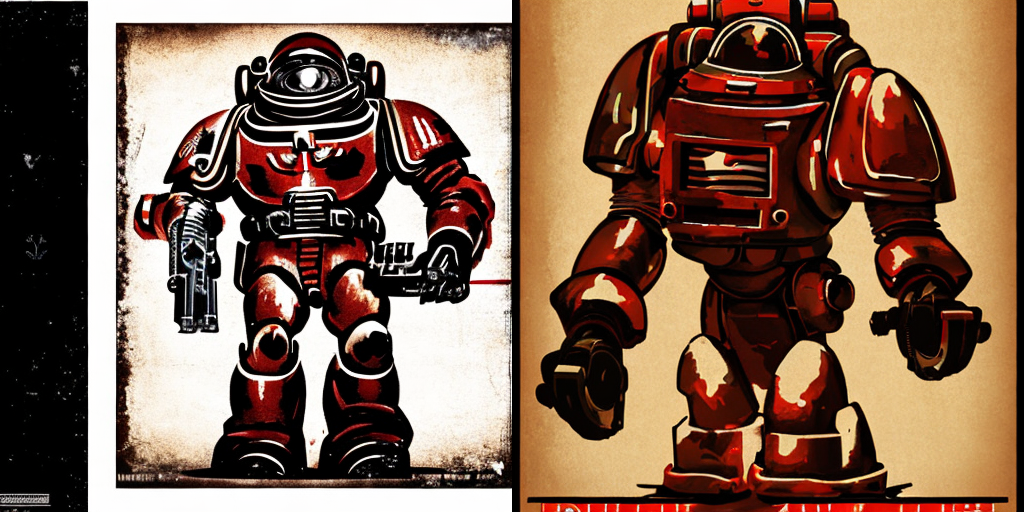

In [62]:
from diffusers.utils import make_image_grid

images = pipeline(**get_inputs(batch_size=2)).images
make_image_grid(images, rows=1, cols=2)